# MLP服饰识别

In [64]:
# 依赖导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score

In [67]:
plt.rcParams['font.sans-serif'] = ['Songti SC']

In [18]:
# 导入数据
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

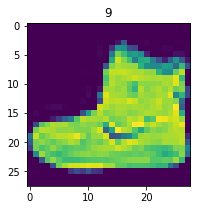

In [19]:
# 样本可视化
img1 = x_train[0]
fig1 = plt.figure(figsize=(3,3))
plt.title(y_train[0])
plt.imshow(img1)

In [24]:
# 输入数据的预处理
feature_size = img1.shape[0] * img1.shape[1]
x_train_format = x_train.reshape(x_train.shape[0], feature_size)
x_test_format = x_test.reshape(x_test.shape[0], feature_size)
print(feature_size)
print(x_train_format.shape)
print(x_test_format.shape)

784
(60000, 784)
(10000, 784)


In [21]:
# 数据的归一化处理
x_train_normal = x_train_format / 255
x_test_normal = x_test_format / 255

In [26]:
# 输出结果的数据预处理
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])
print(y_train[0])
print(y_train_format.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
(60000, 10)


In [29]:
# 建立mlp模型
mlp = Sequential()
mlp.add(Dense(units=392, input_dim=feature_size, activation = "relu"))
mlp.add(Dense(units=196, activation="relu"))
mlp.add(Dense(units=10, activation="softmax"))
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 参数配置
mlp.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [33]:
# 模型训练
mlp.fit(x_train_normal, y_train_format, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2123 - categorical_accuracy: 0.9189
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2052 - categorical_accuracy: 0.9221
Epoch 3/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.1976 - categorical_accuracy: 0.9242
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1906 - categorical_accuracy: 0.9265
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.1841 - categorical_accuracy: 0.9290
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1761 - categorical_accuracy: 0.9326
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1719 - categorical_accuracy: 0.9343
Epoch 8/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1660 - categorical_accuracy: 0.9357
Epoch 9/10
60000/60000 [==============================] 

In [35]:
# 结果预测
y_train_predict = mlp.predict_classes(x_train_normal)

In [37]:
print(y_train_predict[:10])

[9 0 0 3 0 2 7 2 5 5]


In [41]:
# 表现评估
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_train

0.9489

In [42]:
y_test_predict = mlp.predict_classes(x_test_normal)

In [43]:
print(y_test_predict[:10])

[9 2 1 1 6 1 4 6 5 7]


In [46]:
accuracy_test = accuracy_score(y_test, y_test_predict)
accuracy_test

0.8992

In [47]:
# 创建结果标签字典
label_dict={0:'T shirt',1:'裤子',2:'套头衫',3:'裙子',4:'外套 ',5:'凉鞋',6:'衬衫',7:'运动鞋',8:'包 ',9:'踝靴'}
print(label_dict)

{0: 'T shirt', 1: '裤子', 2: '套头衫', 3: '裙子', 4: '外套 ', 5: '凉鞋', 6: '衬衫', 7: '运动鞋', 8: '包 ', 9: '踝靴'}


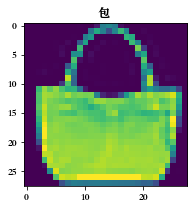

In [68]:
# 样本可视化
img1 = x_train[100]
fig2 = plt.figure(figsize=(3,3))
plt.title(label_dict.get(y_train_predict[100]))
plt.imshow(img1)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


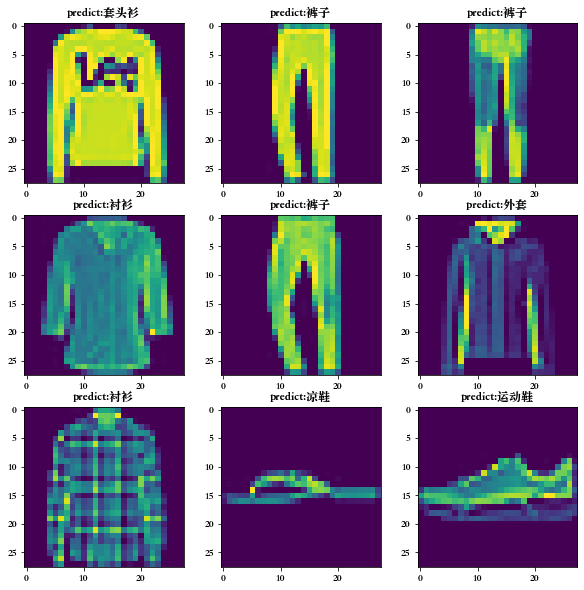

In [72]:
a = [i for i in range(1,10)]
print(a)
fig3 = plt.figure(figsize=(10,10))
font2 = {'family': 'Songti SC'}


for i in a:
    plt.subplot(3,3,i)
    plt.imshow(x_test[i])
    plt.title('predict:{}'.format(label_dict[y_test_predict[i]]),font2)